# Chapter 10

# Simple Perceptron (pg. 307)

In [8]:
import numpy as np
import pandas as pd

In [3]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [23]:
iris = load_iris(as_frame = True)
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df["target"] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [35]:
X = df.loc[:, ["petal length (cm)", "petal width (cm)"]]
y = df["target"] == 0

In [36]:
per_clf = Perceptron(random_state = 42)

In [37]:
per_clf.fit(X, y)

,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,eta0,1.0
,n_jobs,None
,random_state,42


In [50]:
per_clf.coef_

array([[-1.4, -2.2]])

In [51]:
per_clf.intercept_

array([4.])

Therefore, same as `petal length * -1.4 + petal width * -2.2 + 4 >= 0`?

In [52]:
X_new = pd.DataFrame({
    "petal length (cm)": [2, 3, 0],
    "petal width (cm)": [0.5, 1, 0],
})
y_pred = per_clf.predict(X_new)

In [53]:
y_pred

array([ True, False,  True])

# Multilayer Perceptron - Regression (pg. 314)

In [36]:
import pandas as pd
import numpy as np

In [31]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [16]:
housing = fetch_california_housing()

In [17]:
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df["target"] = housing.target

In [18]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [19]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    df.loc[:, df.columns != 'target'],
    df.loc[:, "target"],
    random_state = 42
)

In [20]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full,
    y_train_full,
    random_state = 42
)

In [21]:
mlp_reg = MLPRegressor(hidden_layer_sizes = [50, 50, 50], random_state = 42)

In [26]:
pipeline = make_pipeline(StandardScaler(), mlp_reg)

In [27]:
X_valid

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
10919,2.5000,34.0,3.606400,1.008000,2984.0,4.774400,33.74,-117.86
16047,2.8750,49.0,5.264615,1.070769,1138.0,3.501538,37.71,-122.46
14172,1.7452,24.0,3.338115,1.202869,1012.0,2.073770,32.76,-117.06
7641,5.2034,29.0,5.645492,1.040984,2046.0,4.192623,33.81,-118.28
227,4.7440,48.0,7.117647,1.088235,610.0,2.563025,37.80,-122.19
...,...,...,...,...,...,...,...,...
8125,3.5000,43.0,5.287081,1.122010,1042.0,2.492823,33.82,-118.18
7793,3.1917,35.0,3.908759,1.058394,1412.0,5.153285,33.89,-118.08
20468,3.1630,26.0,4.267241,0.961207,719.0,3.099138,34.27,-118.71
15309,2.4583,35.0,3.741935,1.064516,538.0,2.169355,33.19,-117.38


In [28]:
pipeline.fit(X_train, y_train)

,steps,"[('standardscaler', ...), ('mlpregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,loss,'squared_error'
,hidden_layer_sizes,"[50, 50, ...]"
,activation,'relu'
,solver,'adam'


No activation function in the output layer, so can be any value it wants

In [29]:
y_pred = pipeline.predict(X_valid)

In [39]:
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))

In [40]:
rmse

np.float64(0.5053326657966969)

# Keras - Classification Sequential (pg. 319)

In [72]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [49]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

In [50]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

In [51]:
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [52]:
X_train.shape

(55000, 28, 28)

In [53]:
# Normalize from [0, 255] to [0, 1]
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [54]:
# These are the names of the classes
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

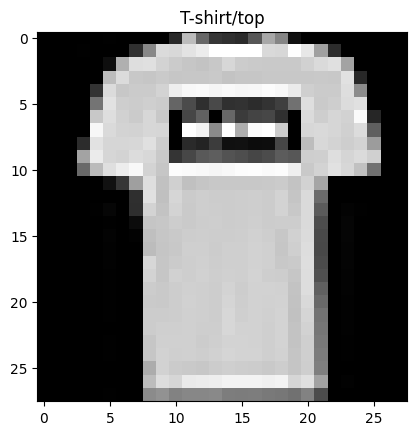

In [55]:
plt.title(class_names[y_train[1]])
plt.imshow(X_train[1], cmap='gray')
plt.show()

In [56]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = [28, 28]))
# Flattens an input like [32, 28, 28] to [32, 784]
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation = "relu"))
model.add(tf.keras.layers.Dense(100, activation = "relu"))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

In [57]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

First layer has 784 * 300 connections + 300 bias = 235, 500 params

In [58]:
hidden1 = model.layers[1]

In [59]:
weights, biases = hidden1.get_weights()

In [60]:
weights

array([[-0.00428925,  0.04870395, -0.06033171, ...,  0.04281945,
        -0.06291402,  0.04124159],
       [-0.0125085 ,  0.04353983, -0.05308156, ...,  0.07172228,
        -0.0521025 ,  0.03322878],
       [-0.00769334,  0.05017808, -0.03108861, ..., -0.01380283,
        -0.07182648, -0.05329331],
       ...,
       [-0.0136653 , -0.01632881, -0.02223335, ...,  0.07035957,
        -0.06645061, -0.06782826],
       [ 0.0581453 , -0.0721359 , -0.05200379, ...,  0.01901855,
         0.02998671, -0.07434538],
       [-0.00341076, -0.05972676, -0.01957395, ..., -0.00233772,
        -0.00801957,  0.05130383]], dtype=float32)

In [61]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [62]:
model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

# Same as
# model.compile(
#     loss = tf.keras.losses.sparse_categorical_crossentropy,
#     optimizer=tf.keras.optimizers.SGD(),
#     metrics=[tf.keras.metrics.sparse_categorical_accuracy]
# )

In [63]:
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 688us/step - accuracy: 0.6836 - loss: 0.9980 - val_accuracy: 0.8282 - val_loss: 0.5004
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 658us/step - accuracy: 0.8262 - loss: 0.5052 - val_accuracy: 0.8432 - val_loss: 0.4497
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 648us/step - accuracy: 0.8457 - loss: 0.4502 - val_accuracy: 0.8480 - val_loss: 0.4241
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 680us/step - accuracy: 0.8553 - loss: 0.4192 - val_accuracy: 0.8520 - val_loss: 0.4075
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 649us/step - accuracy: 0.8616 - loss: 0.3973 - val_accuracy: 0.8556 - val_loss: 0.3971
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 657us/step - accuracy: 0.8666 - loss: 0.3800 - val_accuracy: 0.8582 - val_loss: 0.3889
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 675us/step - accuracy: 0.8715 - loss: 0.3658 - val_accuracy: 0.8612 - val_loss: 0.3811
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 650us/step - accuracy: 0.8743 -

<Axes: xlabel='Epoch'>

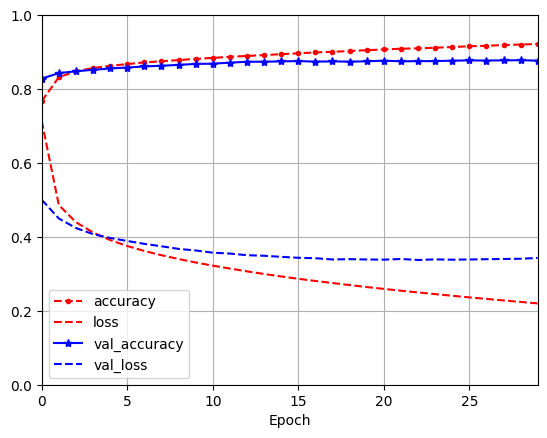

In [65]:
pd.DataFrame(history.history).plot(
    xlim=[0, 29],
    ylim=[0, 1],
    grid=True,
    xlabel="Epoch",
    style=["r--.", "r--", "b-*", "b--"]
)

In [66]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.8768 - loss: 0.3580


[0.3612099587917328, 0.8748999834060669]

In [68]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.02, 0.  , 0.92],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [69]:
y_pred = y_proba.argmax(axis = -1)

In [70]:
y_pred

array([9, 2, 1])

In [73]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [74]:
y_new = y_test[:3]

In [75]:
y_new

array([9, 2, 1], dtype=uint8)

# Keras - Regression Sequential (pg. 329)

In [236]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [237]:
tf.random.set_seed(42)

In [238]:
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df["target"] = housing.target

In [239]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [240]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    df.loc[:, df.columns != "target"],
    df.loc[:, "target"],
    random_state = 42
)

In [241]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full,
    y_train_full
)

In [242]:
norm_layer = tf.keras.layers.Normalization()

In [243]:
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(1),
])

In [244]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3)

In [245]:
model.compile(loss = "mse", optimizer = optimizer, metrics = ["RootMeanSquaredError"])

In [246]:
norm_layer.adapt(X_train.to_numpy())

In [247]:
history = model.fit(
    X_train,
    y_train,
    epochs = 20,
    validation_data = (X_valid, y_valid)
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 602us/step - RootMeanSquaredError: 1.5577 - loss: 2.5613 - val_RootMeanSquaredError: 0.6826 - val_loss: 0.4659
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - RootMeanSquaredError: 0.6949 - loss: 0.4835 - val_RootMeanSquaredError: 0.6304 - val_loss: 0.3974
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - RootMeanSquaredError: 0.6218 - loss: 0.3868 - val_RootMeanSquaredError: 0.6128 - val_loss: 0.3755
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - RootMeanSquaredError: 0.6150 - loss: 0.3783 - val_RootMeanSquaredError: 0.6026 - val_loss: 0.3632
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - RootMeanSquaredError: 0.5894 - loss: 0.3474 - val_RootMeanSquaredError: 0.5965 - val_loss: 0.3558
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - RootMeanSquaredError: 0.5846 - loss: 0.3419 - val_RootMeanSquaredError: 0.5918 - val_loss: 0.3503
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - RootMeanSquaredError

In [248]:
mse_test, rmse_test = model.evaluate(X_test, y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - RootMeanSquaredError: 0.5297 - loss: 0.2808


In [249]:
X_new = X_test[:3]
y_pred = model.predict(X_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [250]:
y_pred

array([[0.58969814],
       [1.3309449 ],
       [5.1171136 ]], dtype=float32)

In [251]:
y_test[:3]

20046    0.47700
3024     0.45800
15663    5.00001
Name: target, dtype: float64

# Keras - Function API / Wide & Deep

Nonsequential neural network that is built with the Functional API. Inputs are connected to the output layer.

In [252]:
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df["target"] = housing.target

In [253]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [254]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation = "relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation = "relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

In [255]:
input_ = tf.keras.layers.Input(shape = X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)

# Both the shallow normalized layer and the hidden 2 layer connect in the concat layer
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

In [256]:
model = tf.keras.Model(inputs = [input_], outputs = [output])

In [257]:
model.summary()

Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_20      │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_23    │ (None, 8)         │         17 │ input_layer_20[0… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_67 (Dense)    │ (None, 30)        │        270 │ normalization_23… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_68 (Dense)    │ (None, 30)        │        930 │ dense_67[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 38)        │          0 │ normalization_23… │
│ (Concatenate)       │                   │            │ dense_68[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_69 (Dense)    │ (None, 1)         │         39 │ concatenate_3[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 17 (72.00 B)

## Subset of Features into the Wide Path (pg. 331)

Features 0 to 4 through wide path, features 2 to 7 through deep path.

In [258]:
input_wide = tf.keras.layers.Input(shape = [5]) # Features 0 to 4
input_deep = tf.keras.layers.Input(shape = [6]) # Features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()

norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)

hidden1 = tf.keras.layers.Dense(30, activation = "relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation = "relu")(hidden1)

concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)

model = tf.keras.Model(inputs = [input_wide, input_deep], outputs = [output])

model.summary()

Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_22      │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_25    │ (None, 6)         │         13 │ input_layer_22[0… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_21      │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_70 (Dense)    │ (None, 30)        │        210 │ normalization_25… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_24    │ (None, 5)         │         11 │ input_layer_21[0… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_71 (Dense)    │ (None, 30)        │        930 │ dense_70[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 35)        │          0 │ normalization_24… │
│ (Concatenate)       │                   │            │ dense_71[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_72 (Dense)    │ (None, 1)         │         36 │ concatenate_4[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,200 (4.70 KB)

 Trainable params: 1,176 (4.59 KB)

 Non-trainable params: 24 (104.00 B)

In [259]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

In [265]:
X_train_wide, X_train_deep = X_train.to_numpy()[:, :5], X_train.to_numpy()[:, 2:]
X_valid_wide, X_valid_deep = X_valid.to_numpy()[:, :5], X_valid.to_numpy()[:, 2:]
X_test_wide, X_test_deep = X_test.to_numpy()[:, :5], X_test.to_numpy()[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

In [266]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

In [267]:
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
validation_data=((X_valid_wide, X_valid_deep), y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - RootMeanSquaredError: 1.9807 - loss: 4.0369 - val_RootMeanSquaredError: 1.0168 - val_loss: 1.0338
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - RootMeanSquaredError: 1.0331 - loss: 1.0785 - val_RootMeanSquaredError: 0.8245 - val_loss: 0.6798
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - RootMeanSquaredError: 0.7897 - loss: 0.6239 - val_RootMeanSquaredError: 0.7579 - val_loss: 0.5744
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - RootMeanSquaredError: 0.7264 - loss: 0.5279 - val_RootMeanSquaredError: 0.7047 - val_loss: 0.4966
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - RootMeanSquaredError: 0.6762 - loss: 0.4575 - val_RootMeanSquaredError: 0.6671 - val_loss: 0.4451
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - RootMeanSquaredError: 0.6424 - loss: 0.4128 - val_RootMeanSquaredError: 0.6433 - val_loss: 0.4139
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - RootMeanSquaredError

In [268]:
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - RootMeanSquaredError: 0.5784 - loss: 0.3347
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [269]:
y_pred

array([[0.60623616],
       [1.6180389 ],
       [3.4641967 ]], dtype=float32)